## Efficiency based on HDBSCAN clusters

For an inferred cluster $k$, define the following variables:

- $C =$ total cost of trips

- $N =$ total passengers

- $M =$ total number of trips

- $c = \frac{C}{N} =$ trip cost per capita

- $\bar{c} = \frac{C}{M} =$ unit cost of trips

<br>

Define the efficiency $E$ relative to aggregation:

- $E = \frac{c_v}{c} = \frac{\text{cost per capita aggregated}}{\text{cost per capita actual}}$

- $c_v = \frac{\alpha \cdot \bar{c} \cdot M_v}{N} =$ van trip cost per capita

- $\alpha =$ relative van operating cost

- $M_v = \lceil N/S \rceil =$ number of van trips 

- $S =$ microtransit van capacity

<br>

Because the cost terms cancel, efficiency $\approx$ relative packing:

- $E = \alpha \cdot \frac{M_v}{M} \rightarrow \frac{E}{\alpha} = \frac{M_v}{M}$ (unitless)

In [8]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
datadir = os.path.join('..', 'data')
outdir = os.path.join('..', 'figures')
pth = os.path.join(datadir, 'trip_cluster.parquet')
df = gpd.read_parquet(pth)

In [3]:
S = 6         # typical microtransit van capacity
msk_clus = (df.cluster_label > -1)
df_clus = df.loc[msk_clus].groupby('cluster_label')
N = df_clus.passenger_count.transform('sum')
M = df_clus.passenger_count.transform('size')
Mv = np.ceil(N / S)
df.loc[msk_clus, 'packing_efficiency'] = Mv / M
df

,medallion,hack_license,pickup,pickup_datetime,vendor_id,rate_code,store_and_fwd_flag,dropoff_datetime,passenger_count,trip_time_in_secs,...,Shape_Area_pickup_,dropoff,index_dropoff,BoroCode_dropoff,BoroName_dropoff,Shape_Leng_dropoff,Shape_Area_dropoff,euclidean_distance,cluster_label,packing_efficiency
0,6EE35E76FB48F9B79A337DDE55381126,16DA2E2A5B7CF561C21886460B636A31,POINT (9.98e+05 2.41e+05),2013-06-03 00:00:00,CMT,1,N,2013-06-03 00:04:25,1,206,...,6.363981e+08,POINT (9.96e+05 2.39e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.526704,-1,NaN
1,9400FEF51A4DE705BD4578E3AB86A318,A0C7F56B74AB6A80B8B602B8F46262A8,POINT (9.92e+05 2.17e+05),2013-06-03 00:00:00,CMT,1,N,2013-06-03 00:05:23,4,310,...,6.363981e+08,POINT (9.96e+05 2.2e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.922924,323,0.277778
2,2B131E11C91746501DB1E449ACFDDED5,2C24F168E6F6B8EC4A4D96E575C0EC40,POINT (1.02e+06 2.19e+05),2013-06-03 00:00:00,CMT,1,N,2013-06-03 00:15:53,1,911,...,3.045058e+09,POINT (9.99e+05 2.17e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,4.512526,164988,0.179245
3,D6B1A78F308FDE278D231C220F83D2A5,931B3AE4A8931DD58BA3E42766889BEC,POINT (9.93e+05 2.17e+05),2013-06-03 00:00:00,CMT,1,N,2013-06-03 00:16:43,1,944,...,6.363981e+08,POINT (1.01e+06 2.18e+05),4.0,4.0,Queens,896934.880411,3.045058e+09,2.873268,165276,0.285714
4,453B4DFA908932D761EF47FE919CDD72,A7B7AAEF95483779C50A7A0551EBD2E4,POINT (9.85e+05 2.01e+05),2013-06-03 00:00:00,CMT,1,N,2013-06-03 00:08:29,1,505,...,6.363981e+08,POINT (9.89e+05 2.03e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.952522,56154,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526788,FA48B4171DF5DAD8991253F81E2BF0FE,B00DC87B11CCEBDABBF86DD1D6E2CD07,POINT (9.85e+05 2.07e+05),2013-06-09 23:57:00,CMT,1,N,2013-06-09 23:58:30,1,74,...,6.363981e+08,POINT (9.85e+05 2.09e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.403466,-1,NaN
1526789,1E268C16FEFBC4384CA90B84F8BDD060,1167EF28EEAC54FEDD1DBE1891B1855E,POINT (9.97e+05 2.23e+05),2013-06-09 23:57:00,CMT,1,N,2013-06-09 23:59:34,1,130,...,6.363981e+08,POINT (9.96e+05 2.2e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.517157,-1,NaN
1526790,68D4B2FDB737B3E4449B8E8FCBEB0CC2,AF905278ACE8A86E989F0B79414571A9,POINT (9.9e+05 2.05e+05),2013-06-09 23:57:00,CMT,1,N,2013-06-09 23:59:59,1,138,...,6.363981e+08,POINT (9.89e+05 2.03e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.431326,162555,0.250000
1526791,D42076D7B45BCFBB8D544D765C2FB094,DC3A15804D7193B647BA71166CF161A8,POINT (9.98e+05 2.25e+05),2013-06-09 23:58:00,CMT,1,N,2013-06-09 23:59:36,1,92,...,6.363981e+08,POINT (1e+06 2.28e+05),3.0,1.0,Manhattan,357180.674063,6.363981e+08,0.478341,160924,0.250000


0.30762229399068514


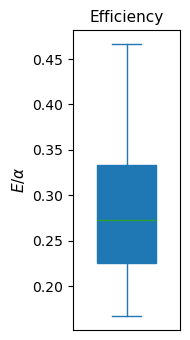

In [4]:
# plot overall efficiency (manhattan only)
fig, ax = plt.subplots(1, 1, figsize = (2, 3.5))
msk_manhattan = (df.BoroName_pickup_ == 'Manhattan')
df.loc[msk_manhattan].packing_efficiency.plot(
    kind = 'box',
    widths = .55,
    showfliers = False,
    patch_artist = True,
    ax = ax)
ax.set_xticks([])
ax.set_title('Efficiency', size = 11)
ax.set_ylabel(r'$E / \alpha$', size = 11)
plt.tight_layout()
plt.savefig(os.path.join(outdir, 'efficiency.svg'))
print(df.loc[msk_manhattan].packing_efficiency.mean())

## Plot efficiency and demand trends

C:\Users\ccrea\AppData\Local\Temp\ipykernel_8992\3605316894.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 50,


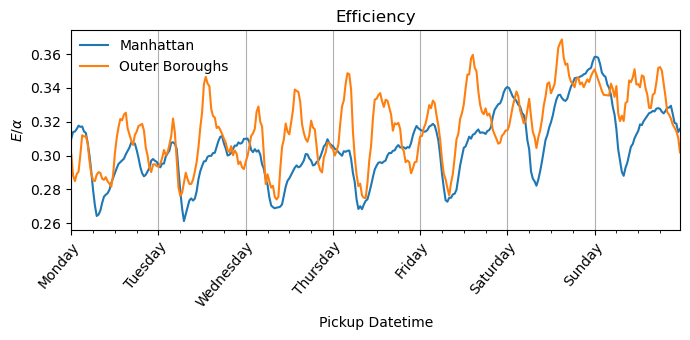

In [ ]:
df_dict = {'Manhattan'      : df.loc[msk_manhattan].copy(),
           'Outer Boroughs' : df.loc[~msk_manhattan].copy()}

# plot manhattan vs. outer boroughs efficiency
freq, win = '30min', '2h'
fig, ax = plt.subplots(1, 1, figsize = (7, 3.5))
grp = pd.Grouper(key = 'pickup_datetime', freq = freq)
for i, (key, _df_) in enumerate(df_dict.items()):
    s = (_df_.groupby(grp, sort = True).packing_efficiency
         .mean().rolling(win).mean())
    ax.plot(s, label = key)

ax.set_xlim(s.index.min(), s.index.max())
ax.set_xlabel('Pickup Datetime')
ax.set_ylabel(r'$E/\alpha$')
ax.set_title('Efficiency')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50,
    rotation_mode = 'anchor', ha = 'right', va = 'top')
ax.legend(frameon = False, borderaxespad = .25)
ax.grid(True, axis = 'x')
plt.tight_layout()
plt.savefig(os.path.join(outdir, 'efficiency_trends.svg'))

C:\Users\ccrea\AppData\Local\Temp\ipykernel_8992\882758133.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 50,


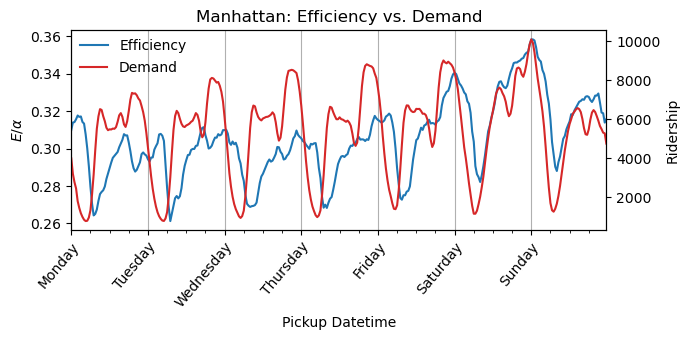

In [6]:
# plot efficiency vs. demand (manhattan)
fig, ax = plt.subplots(1, 1, figsize = (7, 3.5))
df_plt = df_dict['Manhattan'].groupby(grp, sort = True)
eff = df_plt.packing_efficiency.mean().rolling(win).mean()
demand = df_plt.passenger_count.sum().rolling(win).mean()
ax.plot(eff, label = 'Efficiency', c = 'tab:blue')
ax1 = ax.twinx()
ax1.plot(demand, label = 'Demand', c = 'tab:red')
ax.set_xlim(eff.index.min(), eff.index.max())
ax.set_xlabel('Pickup Datetime')
ax.set_ylabel(r'$E/\alpha$')
ax1.set_ylabel('Ridership')
ax.set_title('Manhattan: Efficiency vs. Demand')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50,
    rotation_mode = 'anchor', ha = 'right', va = 'top')
ax.legend(frameon = False, borderaxespad = .25)
ax1.legend(frameon = False, borderaxespad = .25, loc = (.005, .75))
ax.grid(True, axis = 'x')
plt.tight_layout()
plt.savefig(os.path.join(outdir, 'efficiency_vs_demand_manhattan.svg'))

C:\Users\ccrea\AppData\Local\Temp\ipykernel_8992\2079819663.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 50,


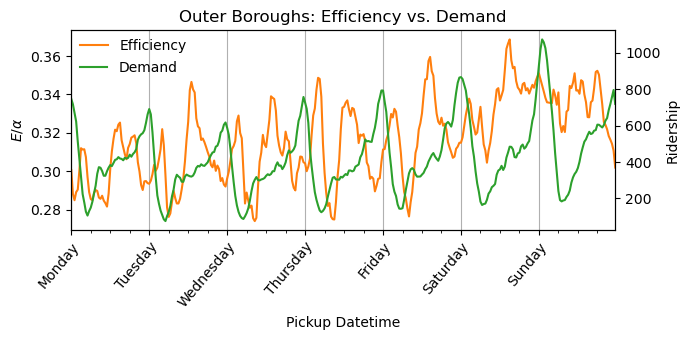

In [7]:
# plot efficiency vs. demand (outer boroughs)
fig, ax = plt.subplots(1, 1, figsize = (7, 3.5))
df_plt = df_dict['Outer Boroughs'].groupby(grp, sort = True)
eff = df_plt.packing_efficiency.mean().rolling(win).mean()
demand = df_plt.passenger_count.sum().rolling(win).mean()
ax.plot(eff, label = 'Efficiency', c = 'tab:orange')
ax1 = ax.twinx()
ax1.plot(demand, label = 'Demand', c = 'tab:green')
ax.set_xlim(eff.index.min(), eff.index.max())
ax.set_xlabel('Pickup Datetime')
ax.set_ylabel(r'$E/\alpha$')
ax1.set_ylabel('Ridership')
ax.set_title('Outer Boroughs: Efficiency vs. Demand')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50,
    rotation_mode = 'anchor', ha = 'right', va = 'top')
ax.legend(frameon = False, borderaxespad = .25)
ax1.legend(frameon = False, borderaxespad = .25, loc = (.005, .75))
ax.grid(True, axis = 'x')
plt.tight_layout()
plt.savefig(os.path.join(outdir, 'efficiency_vs_demand_outer_boroughs.svg'))

## Plot neighborhood efficiency maps

In [110]:
# download geodata NYC neighborhood map
crs = 'EPSG:2263'
pth = geodatasets.get_path('geoda.nyc_neighborhoods')
nyc = gpd.read_file(pth).to_crs(crs)
nyc['geom_nyc'] = nyc.geometry.copy()
df_nyc = gpd.sjoin(df, nyc, 'left', 'within')
df_nyc.set_geometry('geom_nyc', inplace = True)

In [111]:
# manhattan weekday AM efficiency
min_count, am, weekend = 100, (6, 12), '2013-06-08 00:00:00'
agg_dict = {'packing_efficiency' : 'mean', 'geom_nyc' : 'first'}
msk_manhattan = (df_nyc.BoroName_pickup_ == 'Manhattan')
msk_weekday = (df_nyc.pickup_datetime < pd.to_datetime(weekend))
msk_am = (df_nyc.pickup_datetime.dt.hour > am[0]) & \
         (df_nyc.pickup_datetime.dt.hour < am[1])
df_am = df_nyc.loc[msk_manhattan & msk_weekday & msk_am].copy()
count = df_am.ntaname.value_counts()
keep = count.index[count > min_count]
df_am = (df_am.loc[df_am.ntaname.isin(keep)]
         .groupby('ntaname', as_index = False)
         .agg(agg_dict).set_geometry('geom_nyc'))
df_am

,ntaname,packing_efficiency,geom_nyc
0,Battery Park City-Lower Manhattan,0.279067,"MULTIPOLYGON (((9.84e+05 1.92e+05, 9.84e+05 1...."
1,Central Harlem North-Polo Grounds,0.355694,"POLYGON ((1e+06 2.38e+05, 1e+06 2.38e+05, 1e+0..."
2,Central Harlem South,0.336071,"POLYGON ((1e+06 2.33e+05, 1e+06 2.33e+05, 1e+0..."
3,Chinatown,0.321798,"POLYGON ((9.89e+05 2.02e+05, 9.89e+05 2.02e+05..."
4,Clinton,0.294176,"POLYGON ((9.86e+05 2.21e+05, 9.86e+05 2.21e+05..."
5,East Harlem North,0.340437,"MULTIPOLYGON (((1e+06 2.3e+05, 1e+06 2.3e+05, ..."
6,East Harlem South,0.337218,"POLYGON ((1e+06 2.28e+05, 1e+06 2.28e+05, 1e+0..."
7,East Village,0.289905,"POLYGON ((9.89e+05 2.06e+05, 9.89e+05 2.06e+05..."
8,Gramercy,0.274783,"POLYGON ((9.9e+05 2.08e+05, 9.9e+05 2.08e+05, ..."
9,Hamilton Heights,0.312485,"POLYGON ((1e+06 2.42e+05, 1e+06 2.42e+05, 1e+0..."


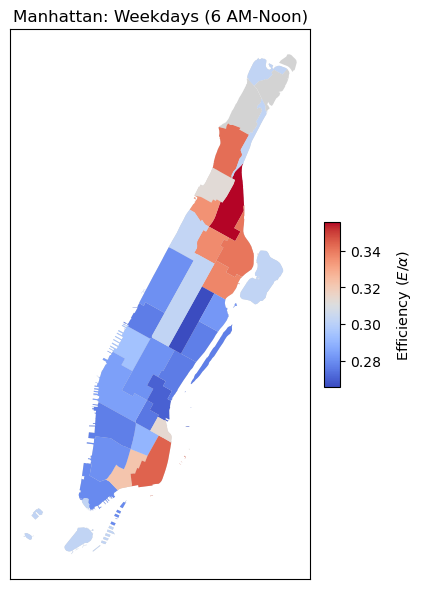

In [117]:
# plot neighborhood map (manhattan weekday AM efficiency)
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
legend_dict = {'pad' : .025, 'shrink' : .3, 'aspect' : 10}
msk = (nyc.boroname == 'Manhattan')
nyc.loc[msk].plot(color = 'lightgray', ax = ax)
df_am.plot(column = 'packing_efficiency',
           cmap = 'coolwarm',
           legend_kwds = legend_dict,
           legend = True, ax = ax)
ax.set_xticks([]); ax.set_yticks([])
ax.set_title('Manhattan: Weekdays (6 AM-Noon)')
cax = ax.get_figure().axes[-1]
cax.set_ylabel(r'Efficiency ($E/\alpha$)', fontsize = 10.5, labelpad = 10)
plt.tight_layout()
plt.savefig(os.path.join(outdir, 'efficiency_manhattan_weekday_AM.svg'), bbox_inches = 'tight')

In [121]:
# outer boroughs weekday PM efficiency
min_count, pm = 100, 18
msk_pm = (df_nyc.pickup_datetime.dt.hour > pm)
df_pm = df_nyc.loc[~msk_manhattan & msk_weekday & msk_pm].copy()
count = df_pm.ntaname.value_counts()
keep = count.index[count > min_count]
df_pm = (df_pm.loc[df_pm.ntaname.isin(keep)]
         .groupby('ntaname', as_index = False)
         .agg(agg_dict).set_geometry('geom_nyc'))
df_pm

,ntaname,packing_efficiency,geom_nyc
0,Airport,0.288826,"MULTIPOLYGON (((1.05e+06 1.72e+05, 1.05e+06 1...."
1,Astoria,0.312408,"POLYGON ((1.01e+06 2.19e+05, 1.01e+06 2.19e+05..."
2,Bedford,0.394656,"POLYGON ((1e+06 1.95e+05, 1e+06 1.94e+05, 1e+0..."
3,Brooklyn Heights-Cobble Hill,0.305271,"POLYGON ((9.86e+05 1.91e+05, 9.86e+05 1.91e+05..."
4,Bushwick South,0.380147,"POLYGON ((1e+06 1.97e+05, 1e+06 1.97e+05, 1e+0..."
5,Carroll Gardens-Columbia Street-Red Hook,0.309513,"POLYGON ((9.86e+05 1.91e+05, 9.86e+05 1.9e+05,..."
6,Clinton Hill,0.324463,"POLYGON ((9.97e+05 1.87e+05, 9.97e+05 1.87e+05..."
7,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,0.309137,"POLYGON ((9.9e+05 1.96e+05, 9.9e+05 1.96e+05, ..."
8,East Williamsburg,0.318911,"POLYGON ((1.01e+06 1.99e+05, 1.01e+06 1.99e+05..."
9,Fort Greene,0.303963,"POLYGON ((9.93e+05 1.93e+05, 9.93e+05 1.93e+05..."


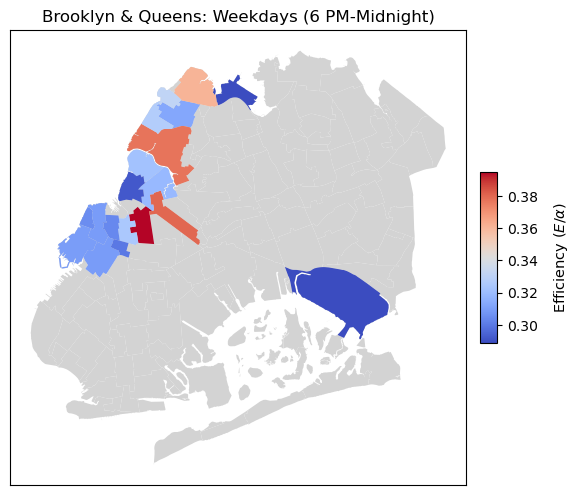

In [126]:
# plot neighborhood map (bk/qns weekday PM efficiency)
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
legend_dict = {'pad' : .025, 'shrink' : .3, 'aspect' : 10}
msk = nyc.boroname.isin(['Brooklyn', 'Queens'])
nyc.loc[msk].plot(color = 'lightgray', ax = ax)
df_pm.plot(column = 'packing_efficiency',
           cmap = 'coolwarm',
           legend_kwds = legend_dict,
           legend = True, ax = ax)
ax.set_xticks([]); ax.set_yticks([])
ax.set_title('Brooklyn & Queens: Weekdays (6 PM-Midnight)')
cax = ax.get_figure().axes[-1]
cax.set_ylabel(r'Efficiency ($E/\alpha$)', fontsize = 10.5, labelpad = 10)
plt.tight_layout()
plt.savefig(os.path.join(outdir, 'efficiency_bk_qns_weekday_PM.svg'), bbox_inches = 'tight')